In [20]:
from gensim.models import Word2Vec
# define training data
sentences = [['this','product','is', 'good', 'and', 'i','like','this','very','much'],['this', 'product', 'is', 'nice'],
['i', 'hate', 'this','product'],['the', 'phone', 'works','well'],['i', 'dislike', 'this', 'phone']]
# train model
model = Word2Vec(sentences, min_count=1, vector_size=2)
# summarize vocabulary
words = list(model.wv.get_vector('like'))
print(words)


[-0.047320068, 0.28842866]


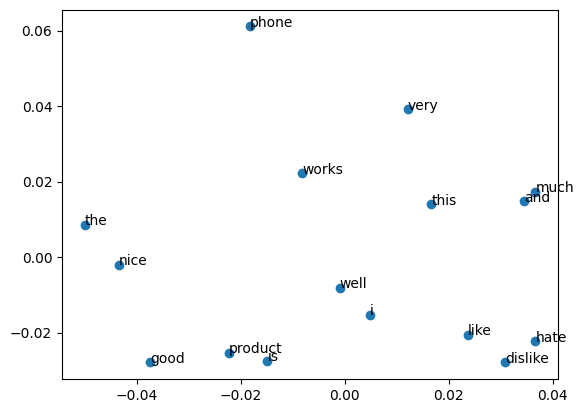

In [36]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'product', 'is', 'good', 'and', 'i', 'like','this','very','much'],['this', 'product', 'is', 'nice'],
['i', 'hate', 'this','product'],['the', 'phone', 'works','well'],['i', 'dislike', 'this', 'phone']]
# train model
model = Word2Vec(sentences, min_count=1,vector_size=50)
# fit a 2d PCA model to the vectors
X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [40]:
import gensim.downloader as api

# Min 12 GB is required
wv = api.load('word2vec-google-news-300')

vec_king = wv['king']

# USE ABOVE CODE or download the file seperatly and run below code

# from gensim.models import KeyedVectors
# # load the google word2vec model
# filename = 'GoogleNews-vectors-negative300.bin'
# model = KeyedVectors.load_word2vec_format(filename, binary=True)
# # calculate: (king - man) + woman = ?
# result = model.most_similar('king')
# print(result)

In [42]:
import pandas as pd
from gensim.models import Word2Vec
import gensim
data=pd.read_csv('AmazonMobileDataCleanedFinal.csv')
sentence_list=[]
for sent in data['cleanedtext']:
    sentence_list.append(sent.split(' '))
w2v_model= gensim.models.Word2Vec(sentence_list,min_count=1,vector_size=50)
print(w2v_model.wv.most_similar('great'))

[('fantastic', 0.8700374364852905), ('good', 0.8614758253097534), ('excellent', 0.8232446908950806), ('perfect', 0.8180364966392517), ('awesome', 0.8098085522651672), ('wonderful', 0.8055000901222229), ('nice', 0.7718616127967834), ('amazing', 0.7717590928077698), ('decent', 0.7592840194702148), ('ok', 0.7441394925117493)]


In [43]:
print(w2v_model.wv.most_similar('mobile'))

[('boost', 0.8067173957824707), ('virgin', 0.778242290019989), ('cellular', 0.7365037798881531), ('cricket', 0.7245219945907593), ('verizons', 0.7231782674789429), ('atts', 0.7222406268119812), ('prepaid', 0.7204118967056274), ('ting', 0.7199416160583496), ('towers', 0.7190907597541809), ('net', 0.713761031627655)]


In [45]:
#https://medium.com/@ranasinghiitkgp/featurization-of-text-data-bow-tf-idf-avgw2v-tfidf-weighted-w2v-7a6c62e8b097
#average word to vec
import numpy as np
from gensim.models import Word2Vec
sentences = [['this','product','is', 'good', 'and', 'i','like','this','very','much'],['this', 'product', 'is', 'nice'],
['i', 'hate', 'this','product'],['the', 'phone', 'works','well'],['i', 'dislike', 'this', 'phone']]
model = Word2Vec(sentences, min_count=1,vector_size=2)
sent_vectors = []; 
for sent in (sentences): 
    sent_vec = np.zeros(2) 
    cnt_words =0; 
    for word in sent: 
        if word in model.wv:
            vec = model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(sent_vectors)


5
[array([-0.06579776, -0.01569375]), array([-0.09429042, -0.06967441]), array([-0.16277736, -0.09150594]), array([-0.00076652,  0.1837862 ]), array([0.23007276, 0.20856074])]


In [50]:
#TFIDF word2vec
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

data=pd.read_csv('data.csv')
sentences=[]
for sent in data['test'].values:
    senten= ' '.join(e for e in sent.split())
    sentences.append(senten.lower().strip())

sentence_list=[]
for sent in sentences:
    sentence_list.append(sent.split(' '))

model = Word2Vec(sentence_list, min_count=1,vector_size=2)
tfidf = TfidfVectorizer()
tfidf.fit(sentences)

dictionary = dict(zip(tfidf.get_feature_names_out(), list(tfidf.idf_)))


tfidf_feat = tfidf.get_feature_names_out() 
w2v_feat=list(model.wv.vectors)
print(w2v_feat)
print(tfidf_feat)

row=0
tfidf_sent_vectors = []; 
for sent in (sentence_list): 
    sent_vec = np.zeros(2) 
    weight_sum =0; 
    for word in sent: 
        if word in model.wv and word in tfidf_feat:
            vec = model.wv[word]
            print(vec)
            # tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1
print(row)
print(tfidf_sent_vectors)

[array([-0.02672235,  0.01191998], dtype=float32), array([0.2551164 , 0.45050988], dtype=float32), array([-0.4651475 , -0.35584044], dtype=float32), array([0.32301816, 0.44869745], dtype=float32), array([-0.2508444 , -0.18822335], dtype=float32), array([ 0.36905837, -0.07666647], dtype=float32), array([-0.22674984,  0.32787627], dtype=float32), array([-0.24300802, -0.09080088], dtype=float32), array([0.14382899, 0.04959369], dtype=float32), array([-0.41426075, -0.4724409 ], dtype=float32), array([0.36546597, 0.2534213 ], dtype=float32)]
['affordable' 'and' 'best' 'cheap' 'fine' 'good' 'is' 'mobile' 'not'
 'this' 'works']
[-0.4651475  -0.35584044]
[-0.02672235  0.01191998]
[0.2551164  0.45050988]
[-0.2508444  -0.18822335]
[-0.4651475  -0.35584044]
[-0.02672235  0.01191998]
[0.2551164  0.45050988]
[0.36546597 0.2534213 ]
[-0.2508444  -0.18822335]
[-0.4651475  -0.35584044]
[-0.02672235  0.01191998]
[-0.41426075 -0.4724409 ]
[0.14382899 0.04959369]
[0.32301816 0.44869745]
[-0.24300802 -0.0